# 檢查系統與環境版本

In [ ]:
'''顯示Jupyter Notebook及其自帶應用環境的系統版本'''
!jupyter --version

jupyter core     : 4.5.0
jupyter-notebook : 5.2.2
qtconsole        : 4.5.2
ipython          : 5.5.0
ipykernel        : 4.10.1
jupyter client   : 5.3.1
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.5.0
nbformat         : 4.4.0
traitlets        : 4.3.2


In [ ]:
'''顯示Python系統版本'''
from platform import python_version

print("Python:", python_version())

Python: 3.7.12


In [ ]:
'''顯示資料庫numpy詳細資料及版本'''
!pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-finance, fbpro

In [ ]:
'''顯示資料庫OpenCV詳細資料及版本'''
!pip show opencv-python

Name: opencv-python
Version: 4.1.2.30
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations


In [ ]:
'''顯示資料庫matplotlib詳細資料及版本'''
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, cycler, kiwisolver, numpy, pyparsing
Required-by: seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [ ]:
'''顯示資料庫pandas詳細資料及版本'''
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pytz, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


# 正文開始

## 影像處理

In [ ]:
from cv2 import INTER_AREA, INTER_CUBIC, resize, imwrite

'''更改影像尺寸'''
def to_size(image, size):
    height, width = image.shape[:2]
    scale = height / size
    dim = (int(width/scale), size)
    
    resizeMode = None
    if scale < 1:
        resizeMode = INTER_AREA
    if scale > 1:
        resizeMode = INTER_CUBIC

    if resizeMode:
        image = resize(image, dim, interpolation=resizeMode)

    return image;

In [ ]:
from cv2 import cvtColor, COLOR_BGR2GRAY, fastNlMeansDenoising

'''圖像降躁'''
def to_denoise(img):
    
    denoisedImage = fastNlMeansDenoising(img, h=10)
    
    return denoisedImage

In [ ]:
'''影像二質化(關係演算法)'''

from cv2 import adaptiveThreshold, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY_INV

def to_adaptivebinary(img, ref=11):
    
    binaryImage = adaptiveThreshold(
        img, 
        255, 
        ADAPTIVE_THRESH_MEAN_C, 
        THRESH_BINARY_INV, 
        ref,
        2
    )

    return binaryImage

'''影像二值化'''

from cv2 import threshold, THRESH_BINARY_INV, THRESH_BINARY

def to_binary(img, clp=230, mode=THRESH_BINARY_INV):
    
    binary = threshold(img, clp, 255, mode)[1]
    
    return binary

In [ ]:
from cv2 import dilate
'''影像膨脹化'''
def to_dilate(image, ker=(3, 3)):
    
    dilation = dilate(image, ker)
    
    return dilation

以下影像處理的函式有`imwrite`程式碼！

如果是在colab的環境下`imwrite`程式會輸出處理完的圖片到`excelImages`資料夾裡，所以如果你下載這份Notebook檔案到colab執行的話，先建立一個資料夾叫做`excelImages`就可以查看切割結果喔！

如果不是用colab例如Jupyter Notebook的話，那請把`/content/excelImages`更改為你想要儲存到的資料夾路徑。

這裡參考了大大「我想问问天」的程式碼，筆者也示範了如何切割表格的方法，這裡沿用筆者的概念運用在我們的專案系統上。

參考網址：https://juejin.cn/post/6844904078032666631

In [ ]:
'''取得僅有線條的影像'''

from cv2 import getStructuringElement, MORPH_RECT, morphologyEx, MORPH_OPEN, MORPH_CLOSE, imwrite
from pathlib import Path as path

def to_lines(img):
    
    rows, cols = img.shape # 圖片長,寬
    
    '''進行垂直開運算，取得直線'''
    kernel = getStructuringElement(MORPH_RECT, (1, rows // 20))
    dilated_row = morphologyEx(img, MORPH_OPEN, kernel) # 影像處理結果(直線)
    imwrite(r"/content/excelImages/_2excel_vertical_lin.png", dilated_row)
    
    '''進行水平開運算，取得橫線'''
    kernel = getStructuringElement(MORPH_RECT, (cols // 40, 1))
    dilated_col = morphologyEx(img, MORPH_OPEN, kernel) # 影像處理結果(橫線)
    imwrite(r"/content/excelImages/_1excel_horizontal_line.png", dilated_col)
    
    return (dilated_row, dilated_col)

In [ ]:
'''取得僅有文字的影像'''

from cv2 import add, subtract

def to_digits(img):
    
    height, width = img.shape[:2]
    
    # 影像二值化
    binary = to_adaptivebinary(img)
    
    # 取得直線影像與橫線影像
    dilated_row, dilated_col = to_lines(binary)
    
    '''直線橫線圖像相加，取得表格輪廓'''
    excel = add(dilated_col, dilated_row)
    imwrite(r"/content/excelImages/_3excel_add.png", excel)
    

    '''二值化圖像與表格輪廓相減，移除表格輪廓'''
    digits = subtract(binary, excel)
    imwrite(r"/content/excelImages/_5excel_subtract.png", digits)

    '''進行開運算，去除雜訊'''
    kernelSize = (2, 2)
    new_kernel = getStructuringElement(MORPH_RECT, kernelSize)
    morphOpen = morphologyEx(digits, MORPH_OPEN, new_kernel)
    imwrite(r"/content/excelImages/_6excel_morphologyEx.png", morphOpen)
    
    '''進行閉運算，修復斷裂文字'''
    kernelSize = (2, 2)
    new_kernel = getStructuringElement(MORPH_RECT, kernelSize)
    morphClose = morphologyEx(morphOpen, MORPH_CLOSE, new_kernel)
    imwrite(r"/content/excelImages/_7excel_morphologyExCLOSE.png", morphClose)
    
    return morphClose

In [ ]:
'''取得直線橫線相交點'''

from cv2 import bitwise_and
from numpy import where

def get_intersect(image):
    
    # 影像二值化
    binary = to_adaptivebinary(image)
    
    # 取得直線影像與橫線影像
    dilated_row, dilated_col = to_lines(binary)
    
    '''直線橫線圖像相減，取得直線與橫線的交點'''
    bitwiseAnd = bitwise_and(dilated_col, dilated_row)
    imwrite("/content/excelImages/_3excel_bitwise_and.png", bitwiseAnd)

    return where(bitwiseAnd > 0)

In [ ]:
'''篩選相交點座標'''

from numpy import sort

def get_corners(coordianate):
    ys, xs = coordianate

    y_point_arr = []
    x_point_arr = []

    
    '''X軸'''
    
    # 排序座標數值，將接近值合併為一個座標
    sort_x_point = sort(xs)
    for i in range(len(sort_x_point) - 1):
        if sort_x_point[i + 1] - sort_x_point[i] > 8:
            x_point_arr.append(sort_x_point[i])
        i = i + 1
    x_point_arr.append(sort_x_point[i])

    # 取得最大間距，合併低於一半的值
    res=0
    for i in range(1, len(x_point_arr)):
        if x_point_arr[i]-x_point_arr[i-1] > res:
            res = (x_point_arr[i]-x_point_arr[i-1])/2
    
    j=0
    for i in range(len(x_point_arr)-1):
        if abs(x_point_arr[i-j]-x_point_arr[i-j+1]) < res:
            x_point_arr[i-j] = x_point_arr[i-j+1]
            del x_point_arr[i-j+1]
            j+=1
    
    '''Y軸'''
    
    # 排序座標數值，將接近值合併為一個座標
    sort_y_point = sort(ys)
    for i in range(len(sort_y_point) - 1):
        if sort_y_point[i + 1] - sort_y_point[i] > 8:
            y_point_arr.append(sort_y_point[i])
        i = i + 1
    y_point_arr.append(sort_y_point[i])
        
    # 取得最大間距，合併低於一半的值
    res=0
    for i in range(1, len(y_point_arr)):
        if y_point_arr[i]-y_point_arr[i-1] > res:
            res = (y_point_arr[i]-y_point_arr[i-1])/2
    
    j=0
    for i in range(len(y_point_arr)-1):
        if abs(y_point_arr[i-j]-y_point_arr[i-j+1]) < res:
            y_point_arr[i-j] = y_point_arr[i-j+1]
            del y_point_arr[i-j+1]
            j+=1

    return sorted(x_point_arr), sorted(y_point_arr)

這下面也有`imwrite`程式碼，但是這邊儲存的資料夾改到`croppedImages`了，為了避免和上面的影像處理搞混。

In [ ]:
'''圖像切割'''

from cv2 import cvtColor, COLOR_BGR2GRAY

def split_image(image):
    
    grayImage = cvtColor(image, COLOR_BGR2GRAY)
    
    croppedImages = []
    
    # 圖像降噪
    denoisedImage = to_denoise(grayImage)
    
    # 取得數字影像
    digitImage = to_digits(denoisedImage)
    
    # 取得裁切點
    x_point_arr, y_point_arr = get_corners(get_intersect(denoisedImage))

    # 裁切
    for i in range(1, len(y_point_arr)):
        temp = []
        for j in range(1, len(x_point_arr)):
            x1, x2, y1, y2 = map(int, (x_point_arr[j-1], x_point_arr[j],\
                                       y_point_arr[i-1], y_point_arr[i]))
            cropImage = digitImage[y1:y2, x1:x2]
            imwrite(r"/content/croppedImages/{0}_{1}.png".format(i, j), cropImage)
            temp.append(cropImage)
        croppedImages.append(temp)

    return croppedImages

測試影像切割結果

In [39]:
from cv2 import imread

path = input()
cp = split_image(imread(path))

/content/2021-12-28 00-40_.jpg


我們在這裡參考了部落格作家「Taha Emara」的文字切割概念！透過標記數字的位置並切割，然後再將切割完的影像加上外框的概念。

參考網址：http://emaraic.com/blog/multi-digit-segmentation-and-recognition

In [40]:
'''標記數字位置(顯示圖表)'''

from cv2 import findContours, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE, boundingRect, rectangle
from matplotlib.pyplot import imshow, show, subplot, cm

def get_digitsinfo(image):
    
    boundboxes = []
    
    image = image.copy()
    
    subplot(1, 4, 1)
    imshow(image, cm.gray)
    
    subplot(1, 4, 2)
    kernelSize = (2, 2)
    new_kernel = getStructuringElement(MORPH_RECT, kernelSize)
    final = morphologyEx(image, MORPH_OPEN, new_kernel)
    imshow(final, cm.gray)

    subplot(1, 4, 3)
    dilation = to_dilate(final)
    imshow(dilation, cm.gray)
    
    (contours, _) = findContours(dilation, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
    print(len(contours))
    
    for cnt in contours:
        x, y, width, height = boundingRect(cnt)
        
        boundboxes.append(((x, y), (x+width, y+height)))
        rectangle(image,(x, y),(x+width, y+height),(255, 255, 255))
    
    subplot(1, 4, 4)
    imshow(image, cm.gray)
    
    show()
    return boundboxes

'''標記數字位置(不顯示圖表)'''
def get_digits(image):
    
    boundboxes = []
    
    image = image.copy()
    
    kernelSize = (2, 2)
    new_kernel = getStructuringElement(MORPH_RECT, kernelSize)
    final = morphologyEx(image, MORPH_OPEN, new_kernel)

    dilation = to_dilate(final)
    
    (contours, _) = findContours(dilation, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        x, y, width, height = boundingRect(cnt)
        
        boundboxes.append(((x, y), (x+width, y+height)))
        rectangle(image,(x, y),(x+width, y+height),(255, 255, 255))
        
    return sorted(boundboxes)

用會顯示圖表的函式顯示出效果，要注意，顯示圖表的程式碼功能只會在Notebook上實現，也就是如果你是用python檔案執行的話不會顯示圖表還會錯誤。所以我們也在py檔的版本移除了這個函式。

7


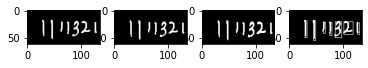

In [41]:
testimg = cp[0][1].copy()
test = get_digitsinfo(testimg)

In [25]:
def digit_image(image):
    
    croppedImages = []
    
    boundboxes = get_digits(image)
    
    binary = to_binary(image, mode=THRESH_BINARY_INV)
    
    for b in boundboxes:
        
        x, y, bwidth, bheight = b[0][0], b[0][1], b[1][0], b[1][1]
        
        cropImage = binary[y:bheight, x:bwidth]
        
        croppedImages.append(cropImage)
        
    return croppedImages

測試切割的結果，一樣這種顯示圖表的程式碼我們都在py檔的版本中改掉了。

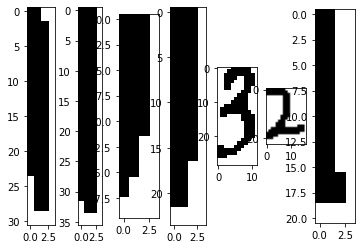

In [42]:
test = digit_image(testimg)

for i in range(len(test)):
    subplot(1, len(test), i+1)
    imshow(test[i], cm.gray)

In [27]:
from cv2 import copyMakeBorder, BORDER_CONSTANT, mean, INTER_NEAREST, COLOR_GRAY2BGR
from numpy import ceil

def to_revision(image):
    
    height, width = image.shape[:2]
    
    # 計算長寬差額，用於補充較低者
    diff = abs(height-width)/2
    extraheight, extrawidth = (0, 0)
    
    if height > width:
        extrawidth = int(ceil(diff))
        if extrawidth > diff:
            extraheight += 1
    
    if width > height:
        extraheight = int(ceil(diff))
        if extraheight > diff:
            extrawidth += 1
    
    # 補充成正方形
    border = copyMakeBorder(
        image,
        top=extraheight,
        bottom=extraheight,
        left=extrawidth,
        right=extrawidth,
        borderType=BORDER_CONSTANT,
        value=(255, 255, 255)
    )

    borderlength = max(border.shape[:2])
    
    # 添加空白外框
    bordersize = int(borderlength*(4/borderlength))
    border = copyMakeBorder(
        border,
        top=bordersize,
        bottom=bordersize,
        left=bordersize,
        right=bordersize,
        borderType=BORDER_CONSTANT,
        value=(255, 255, 255)
    )
    
    border = resize(border, (224, 224), interpolation=INTER_NEAREST)

    return cvtColor(border, COLOR_GRAY2BGR)

調整完的影像效果，看起來是不是很整齊呢？這也是我們要讓電腦更好進行辨識的方法，而且在TensorFlow的機器模型中也只能用正方形的影像來訓練，所以我們也提供正方形的影像讓機器進行預測。

當然！如果你想要用這些處理過的圖片提供給機器模型學習的話也是可以的！我們就是先將這些圖片處理出來之後人工篩選並給機器模型當樣本。

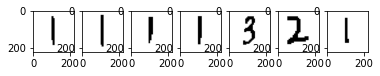

In [43]:
for i in range(len(test)):
    subplot(1, len(test), i+1)
    imshow(to_revision(test[i]), cm.gray)

In [29]:
def split_digits(image):
    
    cp = split_image(image)
    
    digits = []
    for i in range(len(cp)):
        temp=[]
        for j in range(len(cp[i])):
            digtemp=[]
            for digit in digit_image(cp[i][j]):
                final=to_revision(digit)
                digtemp.append(final)
            temp.append(digtemp)
        digits.append(temp)
    
    return digits

## 辨識與輸出CSV檔

這裡會讀取`keras_model.h5`機器模型檔案，請在我們的檔案區中下載`keras_model.h5`並放到colab的檔案區中(如果你是用colab執行的話)，或者把下列程式碼`keras_model.h5`的前端加上檔案路徑！例如'D:\Downloads\keras_model.h5'。因為反斜線在python裡面被視為程式換行，所以記得在第一個引號前面加上英文字母"r"，表示是字串的反斜線。

In [32]:
from keras.models import load_model
from numpy import ndarray, float32, asarray

# Load the model
model = load_model('keras_model.h5')

In [33]:
from numpy import ndarray, float32, asarray

def predict(image):
    
    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = ndarray(shape=(1, 224, 224, 3), dtype=float32)

    #turn the image into a numpy array
    image_array = asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(float32) / 127.0) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction = model.predict(data)
    
    return prediction

這裡會用上面輸入的影像位置進行文字切割`split_digits`函式，也就是處理完圖片後儲存在`digits`變數上。

In [44]:
digits = split_digits(imread(path))

In [35]:
from numpy import argmax

def create_prediction_data(digits):
    
    data = []
    
    for row in range(len(digits)):
        rowData = []
        for img in range(len(digits[row])):
            strData = ''
            for d in range(len(digits[row][img])):
                
                prediction = predict(digits[row][img][d])
                
                if prediction.max() > 0.7:
                    prediction = argmax(prediction)
                    strData += str(prediction if prediction < 10 else '.')
                
            rowData.append(strData)
        
        data.append(rowData)
        
    return data

In [38]:
from pandas import DataFrame

def toCSV(data, fileName):
    DataFrame(data).to_csv(fileName, index = False)

把剛剛儲存的處理完畢的影像給create_prediction_data函式轉換成辨識完畢的結果，最後再交由toCSV輸出CSV檔，就可以查看辨識結果了，可能會花上不少時間。

In [45]:
toCSV(create_prediction_data(digits), "test.csv")

In [ ]:
print(resize(digits[0][0][0], (8, 8)))